# ASSIGNMENT 2

# Datathon 1: Beginners: Taxpayer's Political Party
### To which political party does the taxpayer belong?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Train Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")

In [3]:
data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [4]:
data.shape

(803, 11)

In [5]:
data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
Unnamed: 0        803 non-null int64
HHI               803 non-null int64
HHDL              803 non-null int64
Married           803 non-null int64
CollegGrads       803 non-null int64
AHHAge            803 non-null int64
Cars              803 non-null int64
Filed in 2017     803 non-null int64
Filed in 2016     803 non-null int64
Filed in 2015     803 non-null int64
PoliticalParty    803 non-null object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [7]:
data['PoliticalParty'].value_counts()

Independent    269
Democrat       269
Republican     265
Name: PoliticalParty, dtype: int64

In [8]:
data['Filed in 2015'].value_counts()

1    415
0    388
Name: Filed in 2015, dtype: int64

In [9]:
data['Filed in 2016'].value_counts()

1    409
0    394
Name: Filed in 2016, dtype: int64

In [10]:
data['Filed in 2017'].value_counts()

1    407
0    396
Name: Filed in 2017, dtype: int64

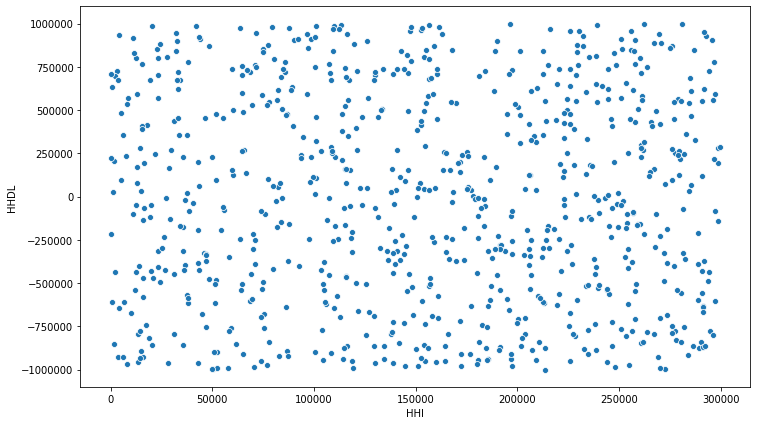

In [11]:
plt.figure(figsize= (12,7))
sns.scatterplot(x=data['HHI'], y=data["HHDL"])
plt.show()

## Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split

###### Spliting data 

In [67]:
taxp_train, taxp_test = train_test_split(data, test_size=0.2, random_state=1, stratify=data['PoliticalParty'])

In [68]:
print("Shape of the original data:", data.shape)
print("Shape of the tax payer train data:", taxp_train.shape)
print("Shape of the tax payer test data:", taxp_test.shape)

#Resetting index for prediction ti,e
taxp_train = taxp_train.reset_index(drop=True)
taxp_test = taxp_test.reset_index(drop=True)

Shape of the original data: (803, 11)
Shape of the tax payer train data: (642, 11)
Shape of the tax payer test data: (161, 11)


In [69]:
taxp_train.head(2)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,958,33396,722543,2,0,51,4,0,1,1,Democrat
1,827,116938,346986,1,3,19,0,1,0,0,Democrat


In [70]:
taxp_test.head(2)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,371,87507,-158453,2,1,56,3,0,1,0,Republican
1,129,120723,-497988,1,2,31,2,1,0,0,Republican


###### Seperating dependent feature and independent features

In [71]:
train_X = taxp_train[taxp_train.columns[:10]]
train_Y = taxp_train['PoliticalParty']

test_X = taxp_test[taxp_test.columns[:10]]
test_Y = taxp_test['PoliticalParty']

###### Building Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression

# Training
model = LogisticRegression()
model.fit(train_X, train_Y)

# Testing
prediction = model.predict(test_X)

###### Putting the above predictions and probabilities together to create a readable dataframe

In [ ]:
taxp_pred_label = pd.DataFrame(prediction.reshape(len(prediction),1))
taxp_pred_label.rename(columns={0:'prediction'}, inplace=True)
taxp_pred_label.head(5)

###### Concat the predictions of linear regression to the test dataset

In [75]:
taxp_test_pred = pd.concat([test_Y, taxp_pred_label], axis=1)
taxp_test_pred.head()

,PoliticalParty,prediction
0,Republican,Republican
1,Republican,Independent
2,Republican,Republican
3,Republican,Democrat
4,Democrat,Democrat


###### Model Accuracy

In [77]:
from sklearn.metrics import accuracy_score
print('Accuracy is:', accuracy_score(test_Y, prediction) * 100.0, "%")

Accuracy is: 34.78260869565217 %


## Test DataSet

In [78]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [79]:
test_data.head(2)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0


In [ ]:
test_data.shape

###### Model Prediction

In [81]:
prediction = model.predict(test_data)

In [82]:
#Putting the above predictions and probabilities together to create a readable df
pred_label = pd.DataFrame(prediction.reshape(len(prediction),1))
pred_label.rename(columns={0:'prediction'}, inplace=True)

In [83]:
pred_label

,prediction
0,Independent
1,Democrat
2,Independent
3,Democrat
4,Independent
...,...
196,Independent
197,Democrat
198,Republican
199,Democrat


###### Sabing predictions as excel file

In [84]:
result = pd.DataFrame(prediction)
result.index = test_data.index 
result.columns = ["prediction"]
result.to_csv("prediction_results.csv", index = False)